In [293]:
import nltk
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np

In [294]:
np.random.seed(500)

In [295]:
df_tweets = pd.read_csv("gs://datasetsanalysis/Twitter_Emotion_Dataset.csv")
df_tweets.isna().sum()

label    0
tweet    0
dtype: int64

In [296]:
# tweets_data = df_tweets.drop(columns={'Unnamed: 0', 'index', 'id', 'conversation_id', 'created_at', 'timezone', 'user_id', 'name', 'place', 'mentions', \
#                                    'urls', 'photos', 'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near', 'geo', \
#                                    'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', \
#                                    'trans_src', 'trans_dest'}, axis=1)
# tweets_data.head()
df_tweets.tail()

label                                              tweet
4396     love  Tahukah kamu, bahwa saat itu papa memejamkan m...
4397     fear  Sulitnya menetapkan Calon Wapresnya Jokowi di ...
4398    anger  5. masa depannya nggak jelas. lha iya, gimana ...
4399    happy  [USERNAME] dulu beneran ada mahasiswa Teknik U...
4400  sadness  Ya Allah, hanya Engkau yang mengetahui rasa sa...

In [297]:
df_tweets = df_tweets.drop_duplicates()
df_tweets.duplicated().sum()

0

In [298]:
import re
import itertools
import string
import gensim
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [299]:
# !pip install sastrawi

In [575]:
def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
df_tweets['tweet'] = df_tweets['tweet'].apply(remove_tweet_special)

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

df_tweets['tweet'] = df_tweets['tweet'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

df_tweets['tweet'] = df_tweets['tweet'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

df_tweets['tweet'] = df_tweets['tweet'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

df_tweets['tweet'] = df_tweets['tweet'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

df_tweets['tweet'] = df_tweets['tweet'].apply(remove_singl_char)

# NLTK word rokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

df_tweets['tweet_tokens'] = df_tweets['tweet'].apply(word_tokenize_wrapper)

def normalizing_words(review):
    return ''.join(''.join(s)[:1] for _, s in itertools.groupby(review))

def preprocess(text):
    text = text.strip()
    text = text.lower()
    text = re.sub('[^0-9a-zA-Z]+', ' ', text)
    text = re.sub(' +', ' ', text).strip()
    text = re.sub(r'\d+', '', text)
    return text

print('Tokenizing Result : \n') 
print(df_tweets['tweet_tokens'].head())
print('\n\n\n')

Tokenizing Result : 

0    [Soal, jln, Jatibarupolisi, tdk, bs, GERTAK, g...
1    [Sesama, cewe, lho, kayaknya, harusnya, bisa, ...
2    [Kepingin, gudeg, mbarek, Bu, hj, Amad, Foto, ...
3    [Jln, Jatibarubagian, dari, wilayah, Tn, Abang...
4    [Sharing, pengalaman, aja, kemarin, jam, batal...
Name: tweet_tokens, dtype: object






In [576]:
def freqDist_wrapper(text):
    return FreqDist(text)

df_tweets['tweet_tokens_fdist'] = df_tweets['tweet_tokens'].apply(freqDist_wrapper)

print('Frequency Tokens : \n') 
print(df_tweets['tweet_tokens_fdist'].head().apply(lambda x : x.most_common()))

Frequency Tokens : 

0    [(tdk, 2), (gubernur, 2), (USERNAME, 2), (Soal...
1    [(rasain, 2), (yang, 2), (Sesama, 1), (cewe, 1...
2    [(Kepingin, 1), (gudeg, 1), (mbarek, 1), (Bu, ...
3    [(wilayah, 2), (Jln, 1), (Jatibarubagian, 1), ...
4    [(di, 2), (Sharing, 1), (pengalaman, 1), (aja,...
Name: tweet_tokens_fdist, dtype: object


In [302]:
def preprocess_tweet(tweet):
    tweet.lower()
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'\@\w+|\#','', tweet)
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    output = stemmer.stem(tweet)
    
    return output

In [303]:
df_tweets.shape

(4390, 4)

In [304]:
df_tweets['tweets_norm'] = df_tweets['tweet'].apply(preprocess_tweet)

In [305]:
df_tweets

label                                              tweet  \
0       anger  Soal jln Jatibarupolisi tdk bs GERTAK gubernur...   
1       anger  Sesama cewe lho kayaknya harusnya bisa lebih r...   
2       happy  Kepingin gudeg mbarek Bu hj Amad Foto dari goo...   
3       anger  Jln Jatibarubagian dari wilayah Tn AbangPengat...   
4       happy  Sharing pengalaman aja kemarin jam batalin tik...   
...       ...                                                ...   
4396     love  Tahukah kamu bahwa saat itu papa memejamkan ma...   
4397     fear  Sulitnya menetapkan Calon Wapresnya Jokowi di ...   
4398    anger  masa depannya nggak jelas lha iya gimana mau j...   
4399    happy  USERNAME dulu beneran ada mahasiswa Teknik UI ...   
4400  sadness  Ya Allah hanya Engkau yang mengetahui rasa sak...   

                                           tweet_tokens  \
0     [Soal, jln, Jatibarupolisi, tdk, bs, GERTAK, g...   
1     [Sesama, cewe, lho, kayaknya, harusnya, bisa, ...   
2     [Kepingin, gudeg, mbarek, Bu, hj, Amad, Foto, ...   
3     [Jln, Jatibarubagian, dari, wilayah, Tn, Abang...   
4     [Sharing, pengalaman, aja, kemarin, jam, batal...   
...                                                 ...   
4396  [Tahukah, kamu, bahwa, saat, itu, papa, memeja...   
4397  [Sulitnya, menetapkan, Calon, Wapresnya, Jokow...   
4398  [masa, depannya, nggak, jelas, lha, iya, giman...   
4399  [USERNAME, dulu, beneran, ada, mahasiswa, Tekn...   
4400  [Ya, Allah, hanya, Engkau, yang, mengetahui, r...   

                                     tweet_tokens_fdist  \
0     {'Soal': 1, 'jln': 1, 'Jatibarupolisi': 1, 'td...   
1     {'Sesama': 1, 'cewe': 1, 'lho': 1, 'kayaknya':...   
2     {'Kepingin': 1, 'gudeg': 1, 'mbarek': 1, 'Bu':...   
3     {'Jln': 1, 'Jatibarubagian': 1, 'dari': 1, 'wi...   
4     {'Sharing': 1, 'pengalaman': 1, 'aja': 1, 'kem...   
...                                                 ...   
4396  {'Tahukah': 1, 'kamu': 1, 'bahwa': 1, 'saat': ...   
4397  {'Sulitnya': 1, 'menetapkan': 1, 'Calon': 1, '...   
4398  {'masa': 1, 'depannya': 1, 'nggak': 1, 'jelas'...   
4399  {'USERNAME': 1, 'dulu': 1, 'beneran': 1, 'ada'...   
4400  {'Ya': 2, 'Allah': 2, 'hanya': 1, 'Engkau': 1,...   

                                            tweets_norm  
0     soal jln jatibarupolisi tdk bs gertak gubernur...  
1     sama cewe lho kayak harus bisa lebih rasain la...  
2     kepingin gudeg mbarek bu hj amad foto dari goo...  
3     jln jatibarubagian dari wilayah tn abangpengat...  
4     sharing alam aja kemarin jam batalin tiket di ...  
...                                                 ...  
4396  tahu kamu bahwa saat itu papa mejam mata dan t...  
4397  sulit tetap calon wapresnya jokowi di pilpres ...  
4398  masa depan nggak jelas lha iya gimana mau jela...  
4399  username dulu beneran ada mahasiswa teknik ui ...  
4400  ya allah hanya engkau yang tahu rasa sakit di ...  

[4390 rows x 5 columns]

In [571]:
df_tweets= pd.read_csv('df_tweets2.csv')

In [17]:
df_tweets = pd.read_csv('../df_tweets.csv')

In [577]:
df_tweets

Unnamed: 0    label                                              tweet  \
0              0    anger  Soal jln Jatibarupolisi tdk bs GERTAK gubernur...   
1              1    anger  Sesama cewe lho kayaknya harusnya bisa lebih r...   
2              2    happy  Kepingin gudeg mbarek Bu hj Amad Foto dari goo...   
3              3    anger  Jln Jatibarubagian dari wilayah Tn AbangPengat...   
4              4    happy  Sharing pengalaman aja kemarin jam batalin tik...   
...          ...      ...                                                ...   
4385        4396     love  Tahukah kamu bahwa saat itu papa memejamkan ma...   
4386        4397     fear  Sulitnya menetapkan Calon Wapresnya Jokowi di ...   
4387        4398    anger  masa depannya nggak jelas lha iya gimana mau j...   
4388        4399    happy  USERNAME dulu beneran ada mahasiswa Teknik UI ...   
4389        4400  sadness  Ya Allah hanya Engkau yang mengetahui rasa sak...   

                                           tweet_tokens  \
0     [Soal, jln, Jatibarupolisi, tdk, bs, GERTAK, g...   
1     [Sesama, cewe, lho, kayaknya, harusnya, bisa, ...   
2     [Kepingin, gudeg, mbarek, Bu, hj, Amad, Foto, ...   
3     [Jln, Jatibarubagian, dari, wilayah, Tn, Abang...   
4     [Sharing, pengalaman, aja, kemarin, jam, batal...   
...                                                 ...   
4385  [Tahukah, kamu, bahwa, saat, itu, papa, memeja...   
4386  [Sulitnya, menetapkan, Calon, Wapresnya, Jokow...   
4387  [masa, depannya, nggak, jelas, lha, iya, giman...   
4388  [USERNAME, dulu, beneran, ada, mahasiswa, Tekn...   
4389  [Ya, Allah, hanya, Engkau, yang, mengetahui, r...   

                                     tweet_tokens_fdist  \
0     {'Soal': 1, 'jln': 1, 'Jatibarupolisi': 1, 'td...   
1     {'Sesama': 1, 'cewe': 1, 'lho': 1, 'kayaknya':...   
2     {'Kepingin': 1, 'gudeg': 1, 'mbarek': 1, 'Bu':...   
3     {'Jln': 1, 'Jatibarubagian': 1, 'dari': 1, 'wi...   
4     {'Sharing': 1, 'pengalaman': 1, 'aja': 1, 'kem...   
...                                                 ...   
4385  {'Tahukah': 1, 'kamu': 1, 'bahwa': 1, 'saat': ...   
4386  {'Sulitnya': 1, 'menetapkan': 1, 'Calon': 1, '...   
4387  {'masa': 1, 'depannya': 1, 'nggak': 1, 'jelas'...   
4388  {'USERNAME': 1, 'dulu': 1, 'beneran': 1, 'ada'...   
4389  {'Ya': 2, 'Allah': 2, 'hanya': 1, 'Engkau': 1,...   

                                            tweets_norm  
0     soal jln jatibarupolisi tdk bs gertak gubernur...  
1     sama cewe lho kayak harus bisa lebih rasain la...  
2     kepingin gudeg mbarek bu hj amad foto dari goo...  
3     jln jatibarubagian dari wilayah tn abangpengat...  
4     sharing alam aja kemarin jam batalin tiket di ...  
...                                                 ...  
4385  tahu kamu bahwa saat itu papa mejam mata dan t...  
4386  sulit tetap calon wapresnya jokowi di pilpres ...  
4387  masa depan nggak jelas lha iya gimana mau jela...  
4388  username dulu beneran ada mahasiswa teknik ui ...  
4389  ya allah hanya engkau yang tahu rasa sakit di ...  

[4390 rows x 6 columns]

In [578]:
d = {}
with open("kbba.txt") as f:
    for line in f:
        (key, val) = line.split('\t')
        d[key] = val
        d[key] = re.sub(r'\n', '', d[key])

In [579]:
def process(ss):
    for line in ss:
        da = ''.join(d.get(word, word) for word in re.split( '(\W+)', line))
        return da

In [580]:
df_tweets['tweets_norm_abbr'] = df_tweets['tweets_norm'].str.replace('[...…]','').str.split().apply(lambda x: ' '.join([d.get(e, e) for e in x]))

In [581]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

remover = StopWordRemoverFactory().create_stop_word_remover()
comment = []
for i in df_tweets['tweets_norm_abbr']: 
    lower = i.lower()
    clean = remover.remove(lower)
    comment.append(clean)   
df_tweets['tweets_stopword'] = pd.DataFrame({'tweets_stopword': comment})

In [661]:
df_tweets['tweet_stop_tokens'] = df_tweets['tweets_stopword'].apply(word_tokenize_wrapper)

In [664]:
def Clean_length(token):
    return [i for i in token if len(i) > ]
def convert_to_string(listReview):
    return ' '.join(listReview)

df_tweets['tweet_stop_tokens'] = df_tweets['tweet_stop_tokens'].apply(Clean_length)
df_tweets['tweet_stop_tokens'] = df_tweets['tweet_stop_tokens'].apply(convert_to_string)

In [666]:
df_tweets

Unnamed: 0    label                                              tweet  \
0              0    anger  Soal jln Jatibarupolisi tdk bs GERTAK gubernur...   
1              1    anger  Sesama cewe lho kayaknya harusnya bisa lebih r...   
2              2    happy  Kepingin gudeg mbarek Bu hj Amad Foto dari goo...   
3              3    anger  Jln Jatibarubagian dari wilayah Tn AbangPengat...   
4              4    happy  Sharing pengalaman aja kemarin jam batalin tik...   
...          ...      ...                                                ...   
4385        4396     love  Tahukah kamu bahwa saat itu papa memejamkan ma...   
4386        4397     fear  Sulitnya menetapkan Calon Wapresnya Jokowi di ...   
4387        4398    anger  masa depannya nggak jelas lha iya gimana mau j...   
4388        4399    happy  USERNAME dulu beneran ada mahasiswa Teknik UI ...   
4389        4400  sadness  Ya Allah hanya Engkau yang mengetahui rasa sak...   

                                           tweet_tokens  \
0     [Soal, jln, Jatibarupolisi, tdk, bs, GERTAK, g...   
1     [Sesama, cewe, lho, kayaknya, harusnya, bisa, ...   
2     [Kepingin, gudeg, mbarek, Bu, hj, Amad, Foto, ...   
3     [Jln, Jatibarubagian, dari, wilayah, Tn, Abang...   
4     [Sharing, pengalaman, aja, kemarin, jam, batal...   
...                                                 ...   
4385  [Tahukah, kamu, bahwa, saat, itu, papa, memeja...   
4386  [Sulitnya, menetapkan, Calon, Wapresnya, Jokow...   
4387  [masa, depannya, nggak, jelas, lha, iya, giman...   
4388  [USERNAME, dulu, beneran, ada, mahasiswa, Tekn...   
4389  [Ya, Allah, hanya, Engkau, yang, mengetahui, r...   

                                     tweet_tokens_fdist  \
0     {'Soal': 1, 'jln': 1, 'Jatibarupolisi': 1, 'td...   
1     {'Sesama': 1, 'cewe': 1, 'lho': 1, 'kayaknya':...   
2     {'Kepingin': 1, 'gudeg': 1, 'mbarek': 1, 'Bu':...   
3     {'Jln': 1, 'Jatibarubagian': 1, 'dari': 1, 'wi...   
4     {'Sharing': 1, 'pengalaman': 1, 'aja': 1, 'kem...   
...                                                 ...   
4385  {'Tahukah': 1, 'kamu': 1, 'bahwa': 1, 'saat': ...   
4386  {'Sulitnya': 1, 'menetapkan': 1, 'Calon': 1, '...   
4387  {'masa': 1, 'depannya': 1, 'nggak': 1, 'jelas'...   
4388  {'USERNAME': 1, 'dulu': 1, 'beneran': 1, 'ada'...   
4389  {'Ya': 2, 'Allah': 2, 'hanya': 1, 'Engkau': 1,...   

                                            tweets_norm  \
0     soal jln jatibarupolisi tdk bs gertak gubernur...   
1     sama cewe lho kayak harus bisa lebih rasain la...   
2     kepingin gudeg mbarek bu hj amad foto dari goo...   
3     jln jatibarubagian dari wilayah tn abangpengat...   
4     sharing alam aja kemarin jam batalin tiket di ...   
...                                                 ...   
4385  tahu kamu bahwa saat itu papa mejam mata dan t...   
4386  sulit tetap calon wapresnya jokowi di pilpres ...   
4387  masa depan nggak jelas lha iya gimana mau jela...   
4388  username dulu beneran ada mahasiswa teknik ui ...   
4389  ya allah hanya engkau yang tahu rasa sakit di ...   

                                       tweets_norm_abbr  \
0     soal jalan jatibarupolisi tidak bisa gertak gu...   
1     sama cewek lho kayak harus bisa lebih rasain l...   
2     mau gudeg mbarek bu hj amad foto dari google s...   
3     jalan jatibarubagian dari wilayah tn abangpeng...   
4     sharing alam saja kemarin jam batalin tiket di...   
...                                                 ...   
4385  tahu kamu bahwa saat itu papa mejam mata dan t...   
4386  sulit tetap calon wapresnya jokowi di pilpres ...   
4387  masa depan tidak jelas lha iya bagaimana mau j...   
4388  username dulu beneran ada mahasiswa teknik ui ...   
4389  iya allah hanya engkau yang tahu rasa sakit di...   

                                        tweets_stopword  \
0     soal jalan jatibarupolisi bisa gertak gubernur...   
1     sama cewek lho kayak bisa lebih rasain lah har...   
2     mau gudeg mbarek bu hj ama

In [515]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [40]:
!kaggle datasets download -d ilhamfp31/word2vec-100-indonesian

 97%|██████████████████████████████████████▉ | 297M/305M [00:03<00:00, 81.8MB/s]
100%|████████████████████████████████████████| 305M/305M [00:03<00:00, 81.5MB/s]


In [41]:
!unzip word2vec-100-indonesian.zip

Archive:  word2vec-100-indonesian.zip
  inflating: idwiki_word2vec_100.model  
  inflating: idwiki_word2vec_100.model.trainables.syn1neg.npy  
  inflating: idwiki_word2vec_100.model.wv.vectors.npy  


In [44]:
path = '../word2vec/idwiki_word2vec_100.model'
id_w2v = gensim.models.word2vec.Word2Vec.load(path)
print(id_w2v.most_similar('cewe'))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


[('cewek', 0.8540853261947632), ('cowo', 0.8269037008285522), ('cowok', 0.8111810684204102), ('temen', 0.779466986656189), ('bule', 0.7218682765960693), ('abis', 0.7044062614440918), ('mupeng', 0.6950250267982483), ('tuh', 0.6821547746658325), ('ceweknya', 0.6821222305297852), ('banget', 0.6735192537307739)]


In [516]:
unique_string = set()
for x in df_tweets['tweets_norm']:
    for y in x.split():
        unique_string.add(y)
        
len(unique_string)

14355

In [517]:
df_tweets['label_id'] = df_tweets['label'].factorize()[0]
from io import StringIO
kategori_id_data = df_tweets[['label', 'label_id']].drop_duplicates().sort_values('label_id')
kategori_to_id = dict(kategori_id_data.values)
id_to_kategori = dict(kategori_id_data[['label_id', 'label']].values)

In [518]:
id_to_kategori

{0: 'anger', 1: 'happy', 2: 'sadness', 3: 'love', 4: 'fear'}

In [519]:
y_list = list(df_tweets['label_id'])
y_new = np.array(y_list)

In [669]:
X_train, X_test, y_train, y_test = train_test_split(df_tweets['tweet_stop_tokens'], df_tweets['label'], test_size=0.2, random_state=0)

In [670]:
X_train

3909    istri nya aku cantik banget yaa tuhan pesek di...
3650    bapak setia damping ibu bapak terus usaha lucu...
1555    iya cma cara puter puter pokok pia palen palin...
1068    username sudah kamu ignore mbak via vallen kar...
1852    kata pgn nemenin aku juang ngerjain skripsi si...
                              ...                        
1033    semua tempat boleh laksana sholat salah satu b...
3264    username username takut ulat nyata tyda sendir...
1653    baca thread fangirl mahasiswa anti kupu rasa s...
2607    username suka inya dingin orgnya sayang bnr bu...
2732    tahu sejak kapan tiap dengarkan kucing ngeong ...
Name: tweet_stop_tokens, Length: 3512, dtype: object

In [671]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [672]:
# print(Tfidf_vect.vocabulary_)

In [673]:
LR_model = LogisticRegression(solver='lbfgs', max_iter=5000)
LR_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=5000)

In [674]:
a = count_vect.transform(X_test)
X_coba = tfidf_transformer.fit_transform(a).toarray()

y_pred = LR_model.predict(X_coba)


In [675]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_pred, y_test) * 100)

[[159   3  14   0  36]
 [ 19  74   5   3  21]
 [ 33   1 128   7  36]
 [  6   2  18  90  14]
 [ 47   8  40  13 101]]
              precision    recall  f1-score   support

       anger       0.60      0.75      0.67       212
        fear       0.84      0.61      0.70       122
       happy       0.62      0.62      0.62       205
        love       0.80      0.69      0.74       130
     sadness       0.49      0.48      0.48       209

    accuracy                           0.63       878
   macro avg       0.67      0.63      0.64       878
weighted avg       0.64      0.63      0.63       878

62.87015945330297


In [658]:
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [659]:
y_pred2 = clf.predict(X_coba)

In [660]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))
print(accuracy_score(y_test, y_pred2))

[[169   1   6   0  36]
 [ 43  31   8   2  38]
 [ 47   0 114   1  43]
 [ 13   0  21  52  44]
 [ 57   1  26   3 122]]
              precision    recall  f1-score   support

       anger       0.51      0.80      0.62       212
        fear       0.94      0.25      0.40       122
       happy       0.65      0.56      0.60       205
        love       0.90      0.40      0.55       130
     sadness       0.43      0.58      0.50       209

    accuracy                           0.56       878
   macro avg       0.69      0.52      0.53       878
weighted avg       0.64      0.56      0.55       878

0.5558086560364465


In [620]:
SVM_model = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM_model.fit(X_train_tfidf, y_train) 

SVC(gamma='auto', kernel='linear')

In [621]:
y_pred3 = SVM_model.predict(X_coba)

In [622]:
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))
print(accuracy_score(y_test, y_pred3))

[[79  2 10  2  9]
 [11 44  7  1  7]
 [ 9  1 66  4 19]
 [ 3  2  9 44 12]
 [19  1 15  6 57]]
              precision    recall  f1-score   support

       anger       0.65      0.77      0.71       102
        fear       0.88      0.63      0.73        70
       happy       0.62      0.67      0.64        99
        love       0.77      0.63      0.69        70
     sadness       0.55      0.58      0.56        98

    accuracy                           0.66       439
   macro avg       0.69      0.66      0.67       439
weighted avg       0.68      0.66      0.66       439

0.6605922551252847


In [623]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [624]:
Ks = 100
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_tfidf, y_train)
    yhat_knn=neigh.predict(X_coba)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat_knn)
    std_acc[n-1]=np.std(yhat_knn==y_test)/np.sqrt(yhat_knn.shape[0])
mean_acc

array([0.42596811, 0.43963554, 0.46013667, 0.49658314, 0.48974943,
       0.50797267, 0.53530752, 0.54669704, 0.5261959 , 0.54669704,
       0.56947608, 0.56947608, 0.5808656 , 0.56719818, 0.56492027,
       0.56947608, 0.55808656, 0.55580866, 0.56264237, 0.56719818,
       0.57630979, 0.55808656, 0.56264237, 0.56264237, 0.57403189,
       0.5808656 , 0.5808656 , 0.58542141, 0.5785877 , 0.59453303,
       0.57403189, 0.57175399, 0.5808656 , 0.5785877 , 0.59225513,
       0.58997722, 0.5808656 , 0.58542141, 0.59225513, 0.59453303,
       0.59453303, 0.60136674, 0.58997722, 0.5785877 , 0.58997722,
       0.58769932, 0.5808656 , 0.58769932, 0.58314351, 0.59453303,
       0.58769932, 0.60820046, 0.60136674, 0.60364465, 0.58769932,
       0.59453303, 0.58769932, 0.59225513, 0.59908884, 0.59453303,
       0.59225513, 0.60136674, 0.59908884, 0.59453303, 0.59681093,
       0.60364465, 0.60364465, 0.59453303, 0.59681093, 0.61047836,
       0.59681093, 0.59908884, 0.59908884, 0.59908884, 0.60136

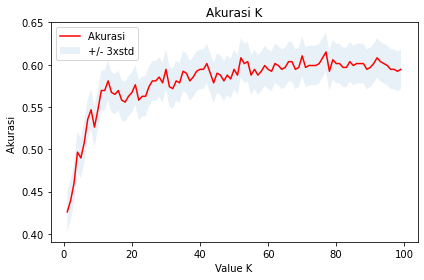

In [625]:
plt.plot(range(1, Ks), mean_acc, 'r')
plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Akurasi ', '+/- 3xstd'))
plt.ylabel('Akurasi ')
plt.xlabel('Value K')
plt.title('Akurasi K')
plt.tight_layout()
plt.show()

In [626]:
print("Akurasi tertinggi adalah %.2f"% mean_acc.max(), "dengan nilai K=", mean_acc.argmax()+1) 

Akurasi tertinggi adalah 0.62 dengan nilai K= 77


In [609]:
kNN_model = KNeighborsClassifier(n_neighbors = mean_acc.argmax()+1).fit(X_train_tfidf, y_train)
yhat_knn=neigh.predict(X_coba)

In [357]:
print(confusion_matrix(y_test,yhat_knn))
print(classification_report(y_test,yhat_knn))
print(accuracy_score(y_test, yhat_knn))

[[74  4 15  4  1]
 [18 39 23 15  7]
 [22 11 47 21 10]
 [ 2  1  2 62  1]
 [10  1  9 13 27]]
              precision    recall  f1-score   support

           0       0.59      0.76      0.66        98
           1       0.70      0.38      0.49       102
           2       0.49      0.42      0.45       111
           3       0.54      0.91      0.68        68
           4       0.59      0.45      0.51        60

    accuracy                           0.57       439
   macro avg       0.58      0.58      0.56       439
weighted avg       0.58      0.57      0.55       439

0.5671981776765376


In [358]:
from sklearn.tree import DecisionTreeClassifier

In [359]:
DT = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
DT.fit(X_train_tfidf, y_train)
predDT = DT.predict(X_coba)

In [360]:
print("Akurasi Decision Tree: ", metrics.accuracy_score(y_test, predDT))
print(confusion_matrix(y_test,predDT))
print(classification_report(y_test,predDT))
print(accuracy_score(y_test, predDT))

Akurasi Decision Tree:  0.45785876993166286
[[29  0 66  2  1]
 [20  3 72  5  2]
 [12  0 87  9  3]
 [ 3  1 12 52  0]
 [ 5  0 23  2 30]]
              precision    recall  f1-score   support

           0       0.42      0.30      0.35        98
           1       0.75      0.03      0.06       102
           2       0.33      0.78      0.47       111
           3       0.74      0.76      0.75        68
           4       0.83      0.50      0.62        60

    accuracy                           0.46       439
   macro avg       0.62      0.47      0.45       439
weighted avg       0.58      0.46      0.41       439

0.45785876993166286


In [361]:
from sklearn.ensemble import RandomForestClassifier

In [363]:
RF = RandomForestClassifier()
RF.fit(X_train_tfidf,y_train)
pred_RF=clf.predict(X_coba)

In [364]:
print(confusion_matrix(y_test,pred_RF))
print(classification_report(y_test,pred_RF))
print(accuracy_score(y_test, pred_RF))

[[89  1  8  0  0]
 [21 60 20  1  0]
 [31  8 71  1  0]
 [ 6 10 33 19  0]
 [21  4 22  1 12]]
              precision    recall  f1-score   support

           0       0.53      0.91      0.67        98
           1       0.72      0.59      0.65       102
           2       0.46      0.64      0.54       111
           3       0.86      0.28      0.42        68
           4       1.00      0.20      0.33        60

    accuracy                           0.57       439
   macro avg       0.72      0.52      0.52       439
weighted avg       0.67      0.57      0.55       439

0.571753986332574


In [256]:
test =['hari ini sangat indah',
       'kok kamu jelek bgt sih',
       'ada berita duka yang menyedihkan',
       'bagaimana kabar hari ini?',
       'semua baik-baik2 saja kan',
      'kenapa kamu sebodoh itu?',
      'kabar jogja hari ini',
      'kapan corona nya pergi',
      'aku takut dengan corona',
      'kamu sayang sama aku?',
      'aku sangat bahagia hari ini']

for i in test :
    y_pred = LR_model.predict(Test_X_Tfidf)
    if y_pred[0]== 0 :
        label = 'anger'
    elif y_pred[0]== 1 :
        label = 'happy'
    elif y_pred[0]== 2 :
        label = 'sadness'
    elif y_pred[0]== 3 :
        label = 'love'
    else :
        label = 'fear'
    print ({"teks": i , "label" : label})

{'teks': 'hari ini sangat indah', 'label': 'love'}
{'teks': 'kok kamu jelek bgt sih', 'label': 'love'}
{'teks': 'ada berita duka yang menyedihkan', 'label': 'love'}
{'teks': 'bagaimana kabar hari ini?', 'label': 'love'}
{'teks': 'semua baik-baik2 saja kan', 'label': 'love'}
{'teks': 'kenapa kamu sebodoh itu?', 'label': 'love'}
{'teks': 'kabar jogja hari ini', 'label': 'love'}
{'teks': 'kapan corona nya pergi', 'label': 'love'}
{'teks': 'aku takut dengan corona', 'label': 'love'}
{'teks': 'kamu sayang sama aku?', 'label': 'love'}
{'teks': 'aku sangat bahagia hari ini', 'label': 'love'}


In [257]:
for i in test :
    y_pred = clf.predict(Test_X_Tfidf)
    if y_pred[0]== 0 :
        label = 'anger'
    elif y_pred[0]== 1 :
        label = 'happy'
    elif y_pred[0]== 2 :
        label = 'sadness'
    elif y_pred[0]== 3 :
        label = 'love'
    else :
        label = 'fear'
    print ({"teks": i , "label" : label})

{'teks': 'hari ini sangat indah', 'label': 'sadness'}
{'teks': 'kok kamu jelek bgt sih', 'label': 'sadness'}
{'teks': 'ada berita duka yang menyedihkan', 'label': 'sadness'}
{'teks': 'bagaimana kabar hari ini?', 'label': 'sadness'}
{'teks': 'semua baik-baik2 saja kan', 'label': 'sadness'}
{'teks': 'kenapa kamu sebodoh itu?', 'label': 'sadness'}
{'teks': 'kabar jogja hari ini', 'label': 'sadness'}
{'teks': 'kapan corona nya pergi', 'label': 'sadness'}
{'teks': 'aku takut dengan corona', 'label': 'sadness'}
{'teks': 'kamu sayang sama aku?', 'label': 'sadness'}
{'teks': 'aku sangat bahagia hari ini', 'label': 'sadness'}


In [588]:
for i in test :
    a = count_vect.transform([i])
    X_coba = tfidf_transformer.fit_transform(a).toarray()
    y_pred = SVM_model.predict(X_coba)
    if y_pred[0]== 0 :
        label = 'anger'
    elif y_pred[0]== 1 :
        label = 'happy'
    elif y_pred[0]== 2 :
        label = 'sadness'
    elif y_pred[0]== 3 :
        label = 'love'
    else :
        label = 'fear'
    print ({"teks": i , "label" : label})

{'teks': 'hari ini sangat indah', 'label': 'happy'}
{'teks': 'kok kamu jelek bgt sih', 'label': 'anger'}
{'teks': 'ada berita duka yang menyedihkan', 'label': 'sadness'}
{'teks': 'bagaimana kabar hari ini?', 'label': 'happy'}
{'teks': 'semua baik-baik2 saja kan', 'label': 'anger'}
{'teks': 'kenapa kamu sebodoh itu?', 'label': 'anger'}
{'teks': 'kabar jogja hari ini', 'label': 'happy'}
{'teks': 'kapan corona nya pergi', 'label': 'sadness'}
{'teks': 'aku takut dengan corona', 'label': 'fear'}
{'teks': 'kamu sayang sama aku?', 'label': 'love'}
{'teks': 'aku sangat bahagia hari ini', 'label': 'happy'}


In [589]:
for i in test :
    a = count_vect.transform([i])
    X_coba = tfidf_transformer.fit_transform(a).toarray()
    y_pred = RF.predict(X_coba)
    if y_pred[0]== 0 :
        label = 'anger'
    elif y_pred[0]== 1 :
        label = 'happy'
    elif y_pred[0]== 2 :
        label = 'sadness'
    elif y_pred[0]== 1 :
        label = 'love'
    else :
        label = 'fear'
    print ({"teks": i , "label" : label})

{'teks': 'hari ini sangat indah', 'label': 'happy'}
{'teks': 'kok kamu jelek bgt sih', 'label': 'anger'}
{'teks': 'ada berita duka yang menyedihkan', 'label': 'sadness'}
{'teks': 'bagaimana kabar hari ini?', 'label': 'happy'}
{'teks': 'semua baik-baik2 saja kan', 'label': 'anger'}
{'teks': 'kenapa kamu sebodoh itu?', 'label': 'anger'}
{'teks': 'kabar jogja hari ini', 'label': 'happy'}
{'teks': 'kapan corona nya pergi', 'label': 'sadness'}
{'teks': 'aku takut dengan corona', 'label': 'fear'}
{'teks': 'kamu sayang sama aku?', 'label': 'fear'}
{'teks': 'aku sangat bahagia hari ini', 'label': 'happy'}


In [590]:
for i in test :
    a = count_vect.transform([i])
    X_coba = tfidf_transformer.fit_transform(a).toarray()
    y_pred = kNN_model.predict(X_coba)
    if y_pred[0]== 0 :
        label = 'anger'
    elif y_pred[0]== 1 :
        label = 'happy'
    elif y_pred[0]== 2 :
        label = 'sadness'
    elif y_pred[0]== 3 :
        label = 'love'
    else :
        label = 'fear'
    print ({"teks": i , "label" : label})

{'teks': 'hari ini sangat indah', 'label': 'happy'}
{'teks': 'kok kamu jelek bgt sih', 'label': 'love'}
{'teks': 'ada berita duka yang menyedihkan', 'label': 'sadness'}
{'teks': 'bagaimana kabar hari ini?', 'label': 'sadness'}
{'teks': 'semua baik-baik2 saja kan', 'label': 'happy'}
{'teks': 'kenapa kamu sebodoh itu?', 'label': 'love'}
{'teks': 'kabar jogja hari ini', 'label': 'happy'}
{'teks': 'kapan corona nya pergi', 'label': 'sadness'}
{'teks': 'aku takut dengan corona', 'label': 'fear'}
{'teks': 'kamu sayang sama aku?', 'label': 'love'}
{'teks': 'aku sangat bahagia hari ini', 'label': 'love'}


In [436]:
import spacy
from wordcloud import WordCloud
from time import time 
import multiprocessing
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook
from sklearn.manifold import TSNE
from sklearn.preprocessing import scale
import keras 
from keras.models import Sequential, Model 
from keras import layers
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, Input, Embedding
from keras.layers.merge import Concatenate
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.metrics import confusion_matrix

In [414]:
model = list(id_w2v.wv.vocab)
len(model)

420024

In [416]:
model = Word2Vec(model)

In [491]:
model.save('word2vec/idwiki_word2vec_100.bin')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: word2vec/idwiki_word2vec_100.bin/assets


In [492]:
df_preprocessed3 = pd.DataFrame({'Tweets': df_preprocessed2})

In [493]:
df_preprocessed3['tweet_tokens'] = df_preprocessed3['Tweets'].apply(word_tokenize_wrapper)
df_preprocessed3.head()

Tweets  \
0  soal jln jatibarupolisi tidak bisa gertak gube...   
1  sama cewe lho kayak harus bisa lebih rasain la...   
2  kepingin gudeg mbarek bu hj amad foto dari goo...   
3  jln jatibarubagian dari wilayah tn abangpengat...   
4  sharing alam aja kemarin jam  batalin tiket di...   

                                        tweet_tokens  
0  [soal, jln, jatibarupolisi, tidak, bisa, gerta...  
1  [sama, cewe, lho, kayak, harus, bisa, lebih, r...  
2  [kepingin, gudeg, mbarek, bu, hj, amad, foto, ...  
3  [jln, jatibarubagian, dari, wilayah, tn, abang...  
4  [sharing, alam, aja, kemarin, jam, batalin, ti...

In [554]:
model_w2v = KeyedVectors.load_word2vec_format('word2vec/model.bin', binary=True, unicode_errors='ignore')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte

In [558]:
#WORD2VEC()
cores = multiprocessing.cpu_count() # Count the number of cores in a computer, important for a parameter of the model

w2v_model2 = Word2Vec(min_count=20,
                     window=2,
                     size=4000,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

#BUILD_VOCAB()
t = time()
w2v_model2.build_vocab(df_preprocessed3["Tweets"], progress_per=1000)
print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

#TRAIN()
w2v_model2.train(df_preprocessed3["tweet_tokens"], total_examples=w2v_model2.corpus_count, epochs=10000, report_delay=1)
print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to build vocab: 0.0 mins
Time to train the model: 0.58 mins


In [559]:
# defining the chart
output_notebook()
plot_tfidf = bp.figure(plot_width=700, plot_height=600, title="A map of 10000 word vectors",
    tools="pan,wheel_zoom,box_zoom,reset,hover,save",
    x_axis_type=None, y_axis_type=None, min_border=1)

# getting a list of word vectors. limit to 10000. each is of 200 dimensions
word_vectors = [w2v_model2[w] for w in list(w2v_model2.wv.vocab.keys())[:5000]]

# dimensionality reduction. converting the vectors to 2d vectors
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_w2v = tsne_model.fit_transform(word_vectors)

# putting everything in a dataframe
tsne_df = pd.DataFrame(tsne_w2v, columns=['x', 'y'])
tsne_df['words'] = list(w2v_model2.wv.vocab.keys())[:5000]

# plotting. the corresponding word appears when you hover on the data point.
plot_tfidf.scatter(x='x', y='y', source=tsne_df)
hover = plot_tfidf.select(dict(type=HoverTool))
hover.tooltips={"word": "@words"}
show(plot_tfidf)

Loading BokehJS ...

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


[t-SNE] Computing 26 nearest neighbors...
[t-SNE] Indexed 27 samples in 0.000s...
[t-SNE] Computed neighbors for 27 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 27 / 27
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.993187
[t-SNE] KL divergence after 1000 iterations: 0.484253


In [529]:
X = np.array(df_preprocessed3["tweet_tokens"])

#And here is the train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y_new, test_size = 0.1, random_state = 0)

In [532]:
vectorizer = TfidfVectorizer(analyzer=lambda x: x, min_df=10)
matrix = vectorizer.fit_transform([x for x in X_train2])
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
print ('vocab size :', len(tfidf))

vocab size : 1273


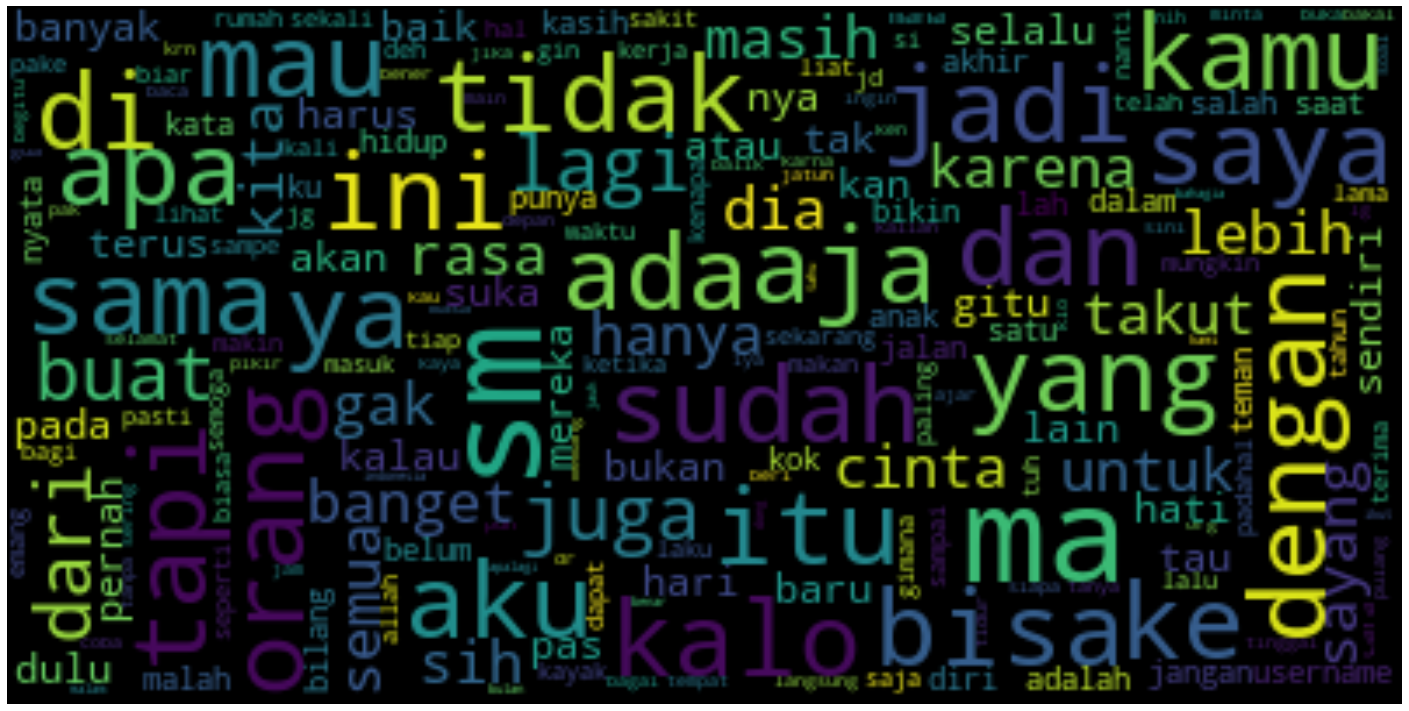

In [469]:
def plot_word_cloud(terms):
    text = terms.index
    text = ' '.join(list(text))
    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.figure(figsize=(25, 25))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

tfidf2 = pd.DataFrame(columns=['tfidf']).from_dict(dict(tfidf), orient='index')
tfidf2.columns = ['tfidf']    
plot_word_cloud(tfidf2.sort_values(by=['tfidf'], ascending=True))

In [533]:
def buildWordVector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += w2v_model[word].reshape((1, size)) * tfidf[word]
            count += 1.
        except KeyError: # handling the case where the token is not
                         # in the corpus. useful for testing.
            continue
    if count != 0:
        vec /= count
    return vec

In [534]:
train_vecs_w2v = np.concatenate([buildWordVector(z, len(df_preprocessed3)) for z in map(lambda x: x, X_train2)])
train_vecs_w2v = scale(train_vecs_w2v)

test_vecs_w2v = np.concatenate([buildWordVector(z, len(df_preprocessed3)) for z in map(lambda x: x, X_test2)])
test_vecs_w2v = scale(test_vecs_w2v)

print ('shape for training set : ',train_vecs_w2v.shape,
      '\nshape for test set : ', test_vecs_w2v.shape)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


ValueError: cannot reshape array of size 300 into shape (1,4390)

In [517]:
model = Sequential()

model.add(Dense(128, activation='relu', input_dim=100))
model.add(Dropout(0.7))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adadelta',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               12928     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 129       
Total params: 13,057
Trainable params: 13,057
Non-trainable params: 0
_________________________________________________________________


In [518]:
history = model.fit(train_vecs_w2v, y_train2, epochs=20, batch_size=50,
                   validation_data=(test_vecs_w2v,y_test2))
loss, accuracy = model.evaluate(train_vecs_w2v, y_train2, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(test_vecs_w2v, y_test2, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/20
80/80 [==============================] - 0s 3ms/step - loss: -0.4700 - accuracy: 0.2508 - val_loss: -0.6983 - val_accuracy: 0.2392
Epoch 2/20
80/80 [==============================] - 0s 1ms/step - loss: -0.4681 - accuracy: 0.2427 - val_loss: -0.7048 - val_accuracy: 0.2392
Epoch 3/20
80/80 [==============================] - 0s 2ms/step - loss: -0.5504 - accuracy: 0.2458 - val_loss: -0.7111 - val_accuracy: 0.2392
Epoch 4/20
80/80 [==============================] - 0s 1ms/step - loss: -0.4665 - accuracy: 0.2435 - val_loss: -0.7171 - val_accuracy: 0.2392
Epoch 5/20
80/80 [==============================] - 0s 1ms/step - loss: -0.4351 - accuracy: 0.2407 - val_loss: -0.7232 - val_accuracy: 0.2392
Epoch 6/20
80/80 [==============================] - 0s 1ms/step - loss: -0.5042 - accuracy: 0.2404 - val_loss: -0.7294 - val_accuracy: 0.2392
Epoch 7/20
80/80 [==============================] - 0s 1ms/step - loss: -0.4913 - accuracy: 0.2483 - val_loss: -0.7353 - val_accuracy: 0.2392
Epoch 

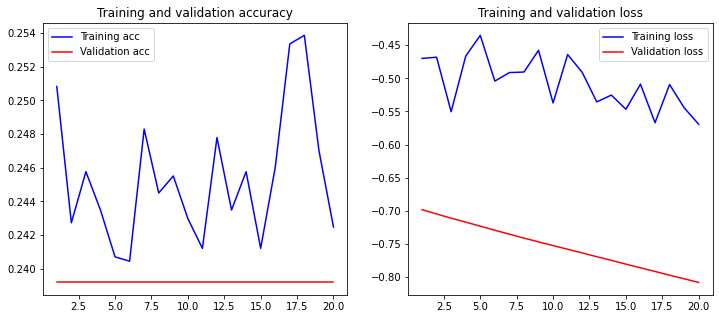

In [547]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history(history)